In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score
from termcolor import colored as cl
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.utils import to_categorical
from keras.regularizers import l2
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [3]:
print(tf.__version__)

2.10.1


In [4]:
data = pd.read_csv('./data/EVSE_augmented_1.5.csv')

C:\Users\bk022\AppData\Local\Temp\ipykernel_11804\1194973390.py:1: DtypeWarning: Columns (264,875) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/EVSE_augmented_1.5.csv')


In [5]:
data.describe()

,time,alarmtimer_alarmtimer_cancel,alarmtimer_alarmtimer_fired,alarmtimer_alarmtimer_start,alarmtimer_alarmtimer_suspend,alignment-faults,ase_spec,block_block_bio_backmerge,block_block_bio_bounce,block_block_bio_complete,...,writeback_writeback_sb_inodes_requeue,writeback_writeback_single_inode,writeback_writeback_single_inode_start,writeback_writeback_start,writeback_writeback_wait,writeback_writeback_wait_iff_congested,writeback_writeback_wake_background,writeback_writeback_write_inode,writeback_writeback_write_inode_start,writeback_writeback_written
count,12702.000000,12702.0,12702.0,12702.0,12702.0,12702.0,1.270200e+04,12702.000000,12702.0,12702.0,...,12702.0,12702.0,12702.0,12702.0,12702.0,12702.0,12702.0,12702.0,12702.0,12702.0
mean,2164.277443,0.0,0.0,0.0,0.0,0.0,1.402211e+08,1124.503385,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1825.508904,0.0,0.0,0.0,0.0,0.0,2.569261e+08,1784.317298,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,5.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,318.892327,0.0,0.0,0.0,0.0,0.0,1.252915e+06,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1815.323575,0.0,0.0,0.0,0.0,0.0,6.046535e+06,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3687.752068,0.0,0.0,0.0,0.0,0.0,9.550802e+07,2326.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5855.669471,0.0,0.0,0.0,0.0,0.0,9.738758e+08,5343.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.head()

,time,alarmtimer_alarmtimer_cancel,alarmtimer_alarmtimer_fired,alarmtimer_alarmtimer_start,alarmtimer_alarmtimer_suspend,alignment-faults,ase_spec,block_block_bio_backmerge,block_block_bio_bounce,block_block_bio_complete,...,writeback_writeback_wait_iff_congested,writeback_writeback_wake_background,writeback_writeback_write_inode,writeback_writeback_write_inode_start,writeback_writeback_written,ChargingState,Attack,Scenario,Label,interface
0,5.001477,0,0,0,0,0,693371795,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
1,5.001487,0,0,0,0,0,699964025,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
2,5.001641,0,0,0,0,0,549770341,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
3,5.003762,0,0,0,0,0,571970875,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
4,10.065740,0,0,0,0,0,553199786,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any


In [7]:
data["Label"].unique()

array(['attack', 'benign'], dtype=object)

In [8]:
cases = len(data)
benign_count = len(data[data.Label == "benign"])
attack_count = len(data[data.Label == "attack"])
anomolies_percentage = round(attack_count/cases*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Benign cases are {}'.format(benign_count), attrs = ['bold']))
print(cl('Number of attack cases are {}'.format(attack_count), attrs = ['bold']))
print(cl('Percentage of attack cases is {}'.format(anomolies_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 12702
Number of Benign cases are 3454
Number of attack cases are 9248
Percentage of attack cases is 72.81
--------------------------------------------


In [9]:
data.duplicated().sum()

0

In [10]:
data = data.drop_duplicates()

In [11]:
total_rows = data.shape[0]
missing_columns = [col for col in data.columns if data[col].isnull().sum()>0]
for col in missing_columns:
  null_count = data[col].isnull().sum()
  per = (null_count/total_rows) * 100
  print(f"{col}: {null_count} ({round(per,3)}%)")

raw_syscalls_sys_enter: 2 (0.016%)
raw_syscalls_sys_exit: 3 (0.024%)
syscalls_sys_enter_arm64_personality: 5 (0.039%)
syscalls_sys_enter_capget: 4 (0.031%)
syscalls_sys_enter_capset: 2 (0.016%)
syscalls_sys_enter_clone: 3 (0.024%)
syscalls_sys_enter_clone3: 4 (0.031%)
syscalls_sys_enter_exit: 2 (0.016%)
syscalls_sys_enter_exit_group: 3 (0.024%)
syscalls_sys_enter_mmap: 2 (0.016%)
syscalls_sys_enter_rt_sigreturn: 3 (0.024%)
syscalls_sys_enter_set_tid_address: 3 (0.024%)
syscalls_sys_enter_unshare: 5 (0.039%)
syscalls_sys_enter_wait4: 2 (0.016%)
syscalls_sys_enter_waitid: 3 (0.024%)
syscalls_sys_exit_arm64_personality: 2 (0.016%)
syscalls_sys_exit_capget: 4 (0.031%)
syscalls_sys_exit_capset: 3 (0.024%)
syscalls_sys_exit_clone: 2 (0.016%)
syscalls_sys_exit_clone3: 3 (0.024%)
syscalls_sys_exit_exit: 3 (0.024%)
syscalls_sys_exit_exit_group: 2 (0.016%)
syscalls_sys_exit_mmap: 2 (0.016%)
syscalls_sys_exit_ptrace: 2 (0.016%)
syscalls_sys_exit_rt_sigreturn: 2 (0.016%)
syscalls_sys_exit_set_tid_

In [12]:
# Impute missing values using the mean for the specified columns
imputer = SimpleImputer(strategy='mean')

for col in missing_columns:
    data[col] = imputer.fit_transform(data[[col]])

data

,time,alarmtimer_alarmtimer_cancel,alarmtimer_alarmtimer_fired,alarmtimer_alarmtimer_start,alarmtimer_alarmtimer_suspend,alignment-faults,ase_spec,block_block_bio_backmerge,block_block_bio_bounce,block_block_bio_complete,...,writeback_writeback_wait_iff_congested,writeback_writeback_wake_background,writeback_writeback_write_inode,writeback_writeback_write_inode_start,writeback_writeback_written,ChargingState,Attack,Scenario,Label,interface
0,5.001477,0,0,0,0,0,693371795,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
1,5.001487,0,0,0,0,0,699964025,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
2,5.001641,0,0,0,0,0,549770341,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
3,5.003762,0,0,0,0,0,571970875,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
4,10.065740,0,0,0,0,0,553199786,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12697,3606.096204,0,0,0,0,0,314710680,2793,0,0,...,0,0,0,0,0,Charging,cryptojacking,Benign,attack,any
12698,1676.161152,0,0,0,0,0,225297323,3612,0,0,...,0,0,0,0,0,idle,cryptojacking,Benign,attack,none
12699,44.944882,0,0,0,0,0,44789343,3726,0,0,...,0,0,0,0,0,Charging,port-scan,DoS,attack,ocpp
12700,2645.700642,0,0,0,0,0,167412921,4291,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,benign,iso15118


In [13]:
def one_hot_encode(data):
    data = pd.get_dummies(data, columns=['ChargingState'], drop_first=True)
    return data

data = one_hot_encode(data)

def label_encode(data):
    for col in data.columns:
        if col == "Label":
            data["Label"] = data["Label"].map({'benign':0, 'attack':1})
        elif data[col].dtype == "object" and col != "ChargingState":
            data[col] = data[col].astype(str)
            label_encoder = LabelEncoder()
            data[col] = label_encoder.fit_transform(data[col])
    return data

data = label_encode(data)

data.head()

,time,alarmtimer_alarmtimer_cancel,alarmtimer_alarmtimer_fired,alarmtimer_alarmtimer_start,alarmtimer_alarmtimer_suspend,alignment-faults,ase_spec,block_block_bio_backmerge,block_block_bio_bounce,block_block_bio_complete,...,writeback_writeback_wait_iff_congested,writeback_writeback_wake_background,writeback_writeback_write_inode,writeback_writeback_write_inode_start,writeback_writeback_written,Attack,Scenario,Label,interface,ChargingState_idle
0,5.001477,0,0,0,0,0,693371795,0,0,0,...,0,0,0,0,0,2,1,1,0,False
1,5.001487,0,0,0,0,0,699964025,0,0,0,...,0,0,0,0,0,2,1,1,0,False
2,5.001641,0,0,0,0,0,549770341,0,0,0,...,0,0,0,0,0,2,1,1,0,False
3,5.003762,0,0,0,0,0,571970875,0,0,0,...,0,0,0,0,0,2,1,1,0,False
4,10.065740,0,0,0,0,0,553199786,0,0,0,...,0,0,0,0,0,2,1,1,0,False


In [14]:
# Select top 15 features using ANOVA F-score
X = data.drop(columns=["Label"])  
y = data["Label"]

In [15]:
scaler = StandardScaler()
# X_selected = scaler.fit_transform(data_selected)
X_selected = scaler.fit_transform(X)

# X_data = data.drop('Label', axis=1)
y_selected = data['Label']

In [16]:

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_selected, y_selected)


In [17]:
# rfc = RandomForestClassifier()

# rfe = RFE(rfc, n_features_to_select=20)
# rfe = rfe.fit(X_data, Y_data)

# feature_map = [(i,v) for i,v in itertools.zip_longest(rfe.get_support(),X_data)]
# selected_features = [v for i,v in feature_map if i==True]

# selected_features

# X_data[selected_features]

In [18]:
# Data Split
X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [19]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label',  fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

In [20]:
#Logistic Regression

lr_model = LogisticRegression(penalty="l2", C=0.1, solver="liblinear", random_state = 42)
lr_model.fit(X_train,Y_train)

lr_yhat = lr_model.predict(X_test)

# Calculate accuracy score
lr_accuracy = accuracy_score(Y_test, lr_yhat)

# Calculate precision score
lr_precision = precision_score(Y_test, lr_yhat)

# Calculate recall score
lr_recall = recall_score(Y_test, lr_yhat)

# Calculate F1 score
lr_f1 = f1_score(Y_test, lr_yhat)

lr_train, lr_test = lr_model.score(X_train, Y_train), lr_model.score(X_test,Y_test)

print(f"Training Score: {lr_train}")
print(f"Test Score: {lr_test}")

Training Score: 0.9272776426061098
Test Score: 0.9132432432432432


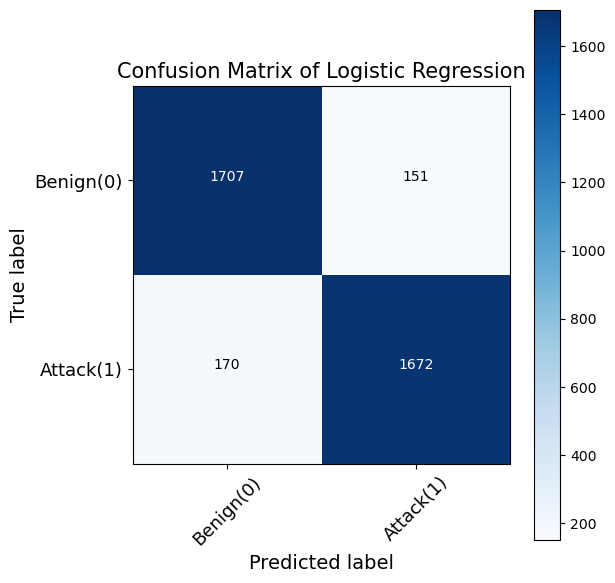

In [21]:
#  Logistic regression

lr_cm_plot = plot_confusion_matrix(confusion_matrix(Y_test, lr_yhat, labels = [0, 1]),
                                classes = ['Benign(0)','Attack(1)'],
                                normalize = False, title = 'Logistic Regression')
plt.show()

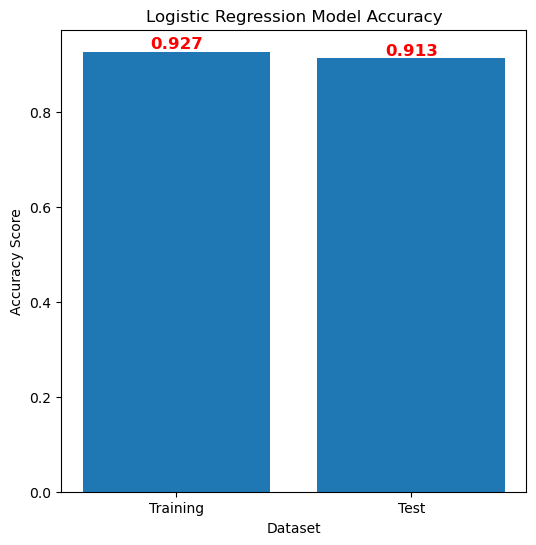

In [22]:
labels = ['Training', 'Test']
lr_train = int(lr_train * 1000) / 1000
lr_test = int(lr_test * 1000) / 1000

accuracy_scores = [lr_train, lr_test]

plt.bar(labels, accuracy_scores)
plt.xlabel('Dataset')
plt.ylabel('Accuracy Score')
plt.title('Logistic Regression Model Accuracy')

for i, v in enumerate(accuracy_scores):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=12, color="red", fontweight="bold")


plt.show()


In [23]:
# !pip install optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [24]:
def objective(trial):
    # Suggest a value for 'n_neighbors' within a range that could help reduce overfitting.
    n_neighbors = trial.suggest_int('KNN_n_neighbors', low=3, high=15)  # increase the upper bound
    
    # Create a KNN classifier model with a pipeline that includes scaling
    classifier_obj = make_pipeline(
        StandardScaler(),  # Ensure the features are scaled
        KNeighborsClassifier(n_neighbors=n_neighbors)
    )
    
    # Perform cross-validation to get a more reliable estimate of the accuracy.
    # We'll use cross-validation with 5 folds (you can adjust this as needed).
    accuracy = cross_val_score(classifier_obj, X_train, Y_train, cv=5, scoring='accuracy').mean()

    # Return the accuracy as the objective value to maximize
    return accuracy

# Create an Optuna study with the objective to maximize accuracy.
study_KNN = optuna.create_study()

# Run the optimization process with a reasonable number of trials (e.g., 20).
study_KNN.optimize(objective, n_trials=20)

In [25]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(X_train,Y_train)

knn_yhat = KNN_model.predict(X_test)

# Calculate accuracy score
knn_accuracy = accuracy_score(Y_test, knn_yhat)

# Calculate precision score
knn_precision = precision_score(Y_test, knn_yhat)

# Calculate recall score
knn_recall = recall_score(Y_test, knn_yhat)

# Calculate F1 score
knn_f1 = f1_score(Y_test, knn_yhat)

KNN_train, KNN_test = KNN_model.score(X_train, Y_train), KNN_model.score(X_test,Y_test)

print(f"Training Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Training Score: 0.8746958637469586
Test Score: 0.8764864864864865


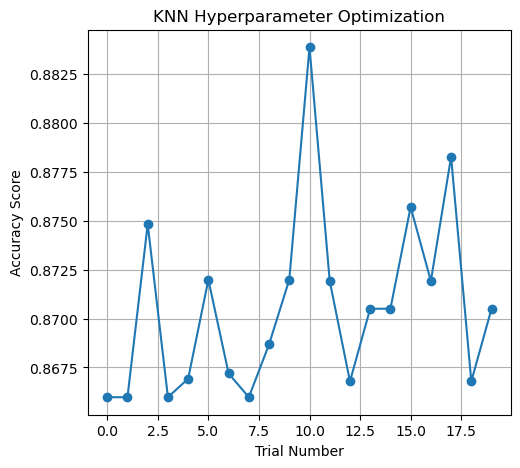

In [26]:
knn_trial_numbers = list(range(len(study_KNN.trials)))
knn_accuracy_scores = [trial.value for trial in study_KNN.trials]

# Create two line plots to visualize the optimization process for KNN and Decision Tree
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(knn_trial_numbers, knn_accuracy_scores, marker='o')
plt.xlabel('Trial Number')
plt.ylabel('Accuracy Score')
plt.title('KNN Hyperparameter Optimization')
plt.grid(True)

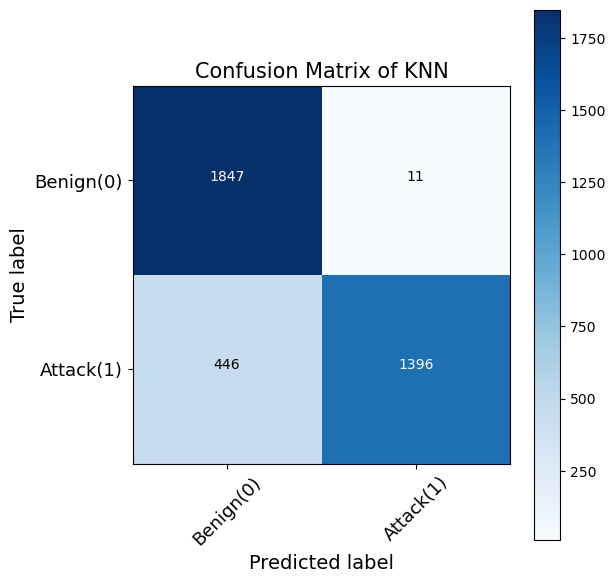

In [27]:
# K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(confusion_matrix(Y_test, knn_yhat, labels = [0, 1]),
                                classes = ['Benign(0)','Attack(1)'],
                                normalize = False, title = 'KNN')
plt.show()

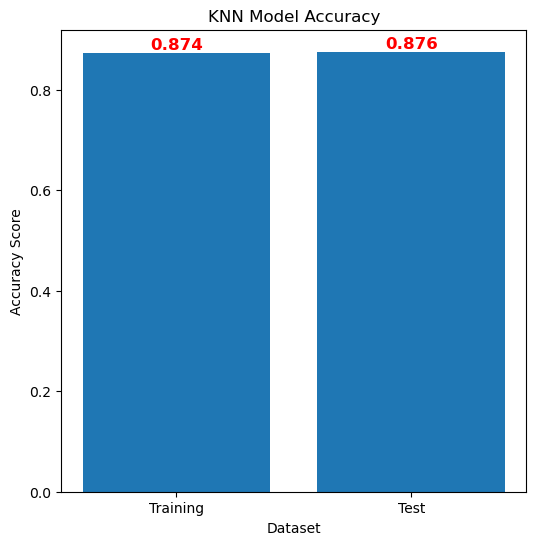

In [28]:
labels = ['Training', 'Test']
KNN_train = int(KNN_train * 1000) / 1000
KNN_test = int(KNN_test * 1000) / 1000

accuracy_scores = [KNN_train, KNN_test]

plt.bar(labels, accuracy_scores)
plt.xlabel('Dataset')
plt.ylabel('Accuracy Score')
plt.title('KNN Model Accuracy')

for i, v in enumerate(accuracy_scores):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=12, color="red", fontweight='bold')

plt.show()

In [29]:
#Decision Tree Classifier

def objective(trial):
  dt_max_depth = trial.suggest_int('dt_max_depth',2,18,log=False)
  dt_max_features = trial.suggest_int('dt_max_features',3,8,log=False)
  classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
  classifier_obj.fit(X_train,Y_train)
  accuracy = classifier_obj.score(X_test,Y_test)
  return accuracy

study_dt = optuna.create_study(direction="maximize")
study_dt.optimize(objective,n_trials=30)

In [30]:
dt_model = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt_model.fit(X_train, Y_train)

dt_yhat = dt_model.predict(X_test)

# Calculate accuracy score
dt_accuracy = accuracy_score(Y_test, dt_yhat)

# Calculate precision score
dt_precision = precision_score(Y_test, dt_yhat)

# Calculate recall score
dt_recall = recall_score(Y_test, dt_yhat)

# Calculate F1 score
dt_f1 = f1_score(Y_test, dt_yhat)

dt_train, dt_test = dt_model.score(X_train,Y_train), dt_model.score(X_test,Y_test)

print(f"Training Score: {dt_train}")
print(f"Test Score: {dt_test}")

Training Score: 0.9238983509056502
Test Score: 0.8770270270270271


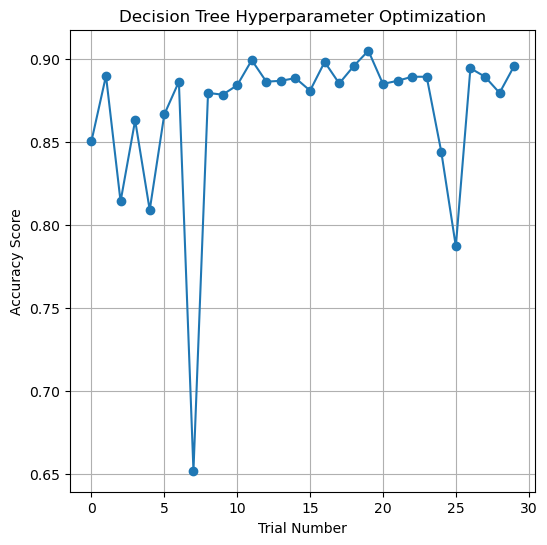

In [31]:
trial_numbers = list(range(len(study_dt.trials)))
accuracy_scores = [trial.value for trial in study_dt.trials]

# Create a line plot to visualize the optimization process
plt.plot(trial_numbers, accuracy_scores, marker='o')
plt.xlabel('Trial Number')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Hyperparameter Optimization')
plt.grid(True)

plt.show()

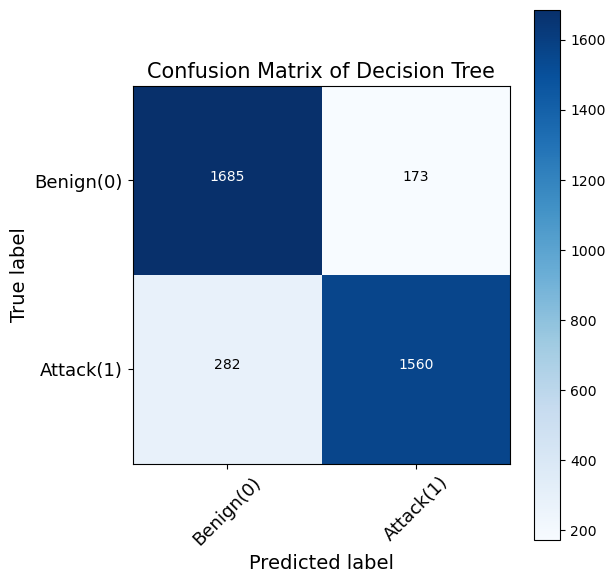

In [32]:
# Decision tree

tree_cm_plot = plot_confusion_matrix(confusion_matrix(Y_test, dt_yhat, labels = [0, 1]),
                                classes = ['Benign(0)','Attack(1)'],
                                normalize = False, title = 'Decision Tree')

plt.show()

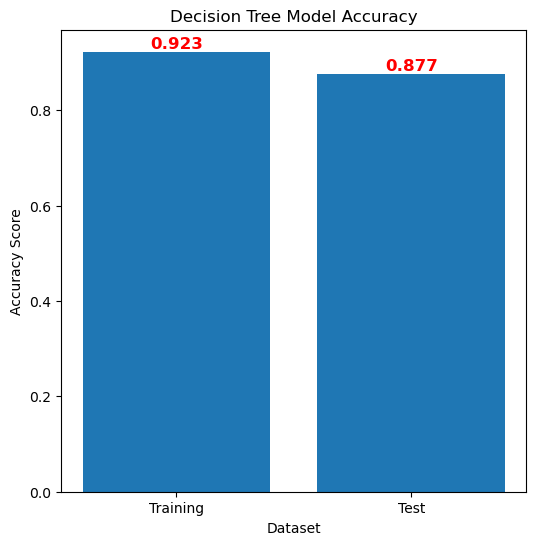

In [33]:
labels = ['Training', 'Test']
dt_train = int(dt_train * 1000) / 1000
dt_test = int(dt_test * 1000) / 1000

accuracy_scores = [dt_train, dt_test]

plt.bar(labels, accuracy_scores)
plt.xlabel('Dataset')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Model Accuracy')

for i, v in enumerate(accuracy_scores):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=12, color="red", fontweight='bold')

plt.show()

In [29]:
# Support Vector Machine

SVM_model = SVC(kernel='rbf', class_weight='balanced', C=0.12, random_state=42)
SVM_model.fit(X_train, Y_train)

svm_yhat = SVM_model.predict(X_test)

# Calculate accuracy score
svm_accuracy = accuracy_score(Y_test, svm_yhat)

# Calculate precision score
svm_precision = precision_score(Y_test, svm_yhat)

# Calculate recall score
svm_recall = recall_score(Y_test, svm_yhat)

# Calculate F1 score
svm_f1 = f1_score(Y_test, svm_yhat)

svm_train, svm_test = SVM_model.score(X_train, Y_train), SVM_model.score(X_test,Y_test)

print(f"Training Score: {svm_train}")
print(f"Test Score: {svm_test}")

Training Score: 0.936198972695323
Test Score: 0.9267567567567567


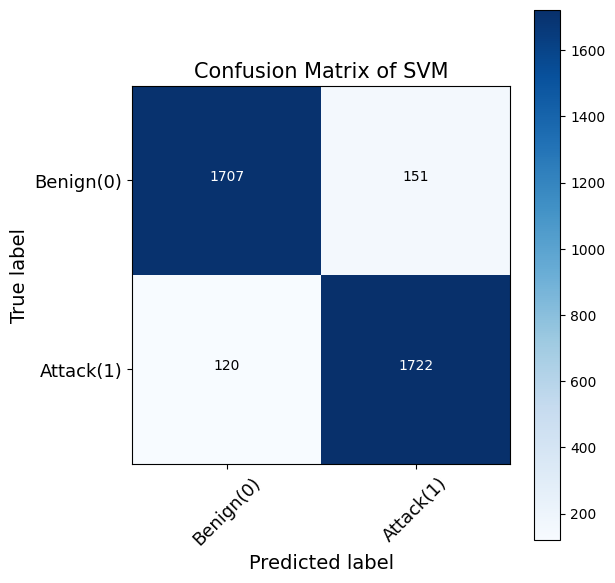

In [30]:
#  Support Vector Machine

lr_cm_plot = plot_confusion_matrix(confusion_matrix(Y_test, svm_yhat, labels = [0, 1]),
                                classes = ['Benign(0)','Attack(1)'],
                                normalize = False, title = 'SVM')
plt.show()

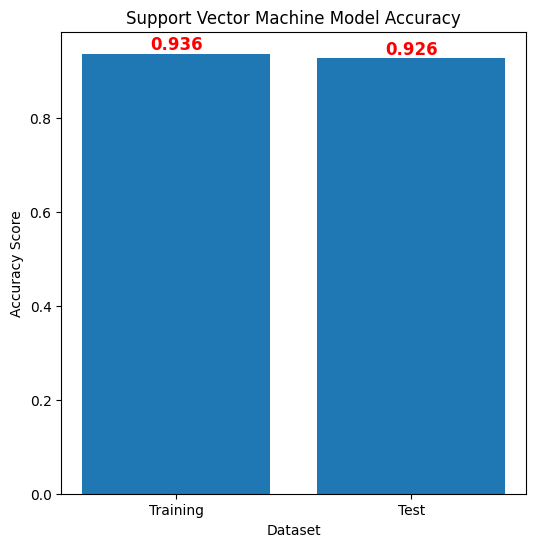

In [31]:
labels = ['Training', 'Test']
svm_train = int(svm_train * 1000) / 1000
svm_test = int(svm_test * 1000) / 1000

accuracy_scores = [svm_train, svm_test]

plt.bar(labels, accuracy_scores)
plt.xlabel('Dataset')
plt.ylabel('Accuracy Score')
plt.title('Support Vector Machine Model Accuracy')

for i, v in enumerate(accuracy_scores):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=12, color="red", fontweight='bold')

plt.show()

In [ ]:
data = [['Logistic Regression', lr_precision,lr_recall, lr_f1, lr_accuracy],
        ["KNN", knn_precision, knn_recall, knn_f1, knn_accuracy],
        ['Decision Tree', dt_precision, dt_recall, dt_f1 , dt_accuracy],
        ['SVM', svm_precision, svm_recall, svm_f1, svm_accuracy]]

col_names = ["Model", "Precision", "Recall", "F1 Score", "Accuracy"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═════════════╤══════════╤════════════╤════════════╕
│ Model               │   Precision │   Recall │   F1 Score │   Accuracy │
╞═════════════════════╪═════════════╪══════════╪════════════╪════════════╡
│ Logistic Regression │       91.72 │    90.77 │      91.24 │      91.32 │
├─────────────────────┼─────────────┼──────────┼────────────┼────────────┤
│ KNN                 │       99.22 │    75.79 │      85.93 │      87.65 │
├─────────────────────┼─────────────┼──────────┼────────────┼────────────┤
│ Decision Tree       │       90.02 │    84.69 │      87.27 │      87.7  │
├─────────────────────┼─────────────┼──────────┼────────────┼────────────┤
│ SVM                 │       91.94 │    93.49 │      92.71 │      92.68 │
╘═════════════════════╧═════════════╧══════════╧════════════╧════════════╛
